In [4]:
%matplotlib inline
import numpy as np; np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_palette(sns.color_palette('viridis'))
plt.rcParams['figure.figsize'] = (20, 6)
sns.set_context('paper')

import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append("../src/")

from sgpi.util import get_dataset, get_xy

In [2]:
def plot_tsne(dataset, continous, perplexity=30, random_state=42):
    df = get_dataset(dataset)
    X, y = get_xy(df)
    
    # Remove effect of variance, centering doesn't matter
    scaler = StandardScaler()
    X = scaler.fit_transform(X)  
    
    tsne = TSNE(perplexity=perplexity, init='pca', random_state=random_state)
    X = tsne.fit_transform(X, y)
    x_1 = X[:,0]
    x_2 = X[:,1]
    fig, ax = plt.subplots()
    if continous:
        sc = ax.scatter(x_1, x_2, c=y, cmap='cool')
        cb = fig.colorbar(sc)
        cb.set_label(str(df.columns[-1]))
    else:   
        n_classes = y.max() + 1
        palette = np.array(sns.color_palette("husl", n_classes))
        sc = ax.scatter(x_1, x_2, c= palette[y.astype(int)], marker='o', s=40)
    ax.legend()
    ax.set_axis_off()
    ax.set_title("T-SNE for {}".format(dataset))
    fig.show()

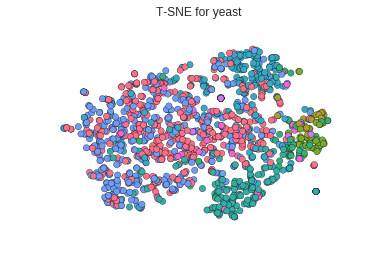

In [140]:
plot_tsne('yeast', False)

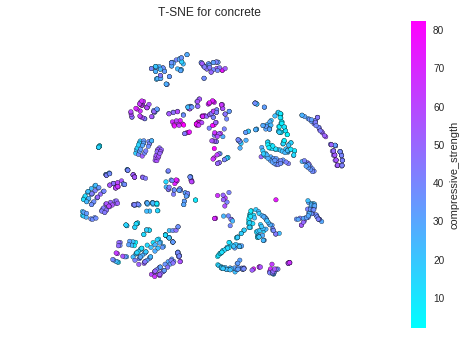

In [9]:
plot_tsne('concrete', True, perplexity=30)

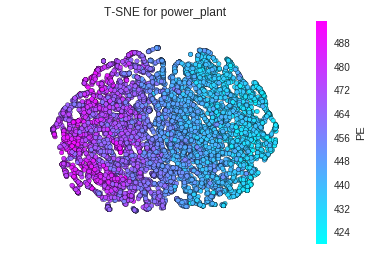

In [138]:
plot_tsne('power_plant', True, perplexity=20)

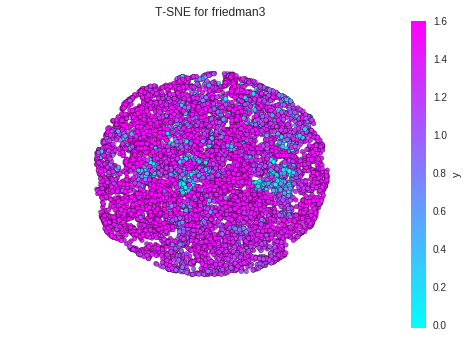

In [10]:
plot_tsne('friedman3', True)

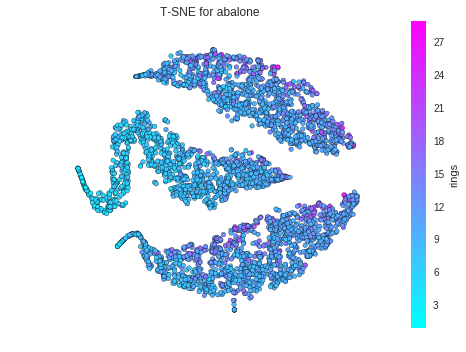

In [11]:
plot_tsne('abalone', True)

/home/lukaskrenz/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/lukaskrenz/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


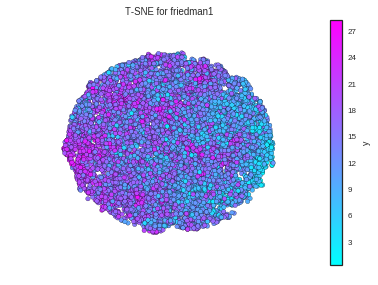

In [5]:
plot_tsne('friedman1', True)

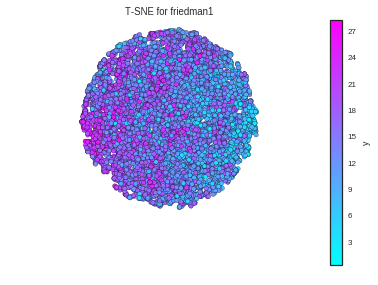

In [6]:
plot_tsne('friedman1', True, perplexity=10)

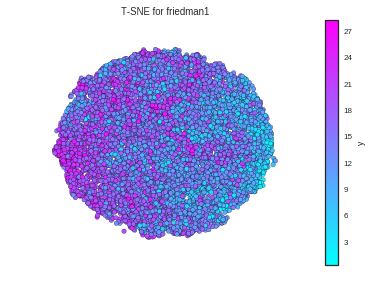

In [7]:
plot_tsne('friedman1', True, perplexity=50)

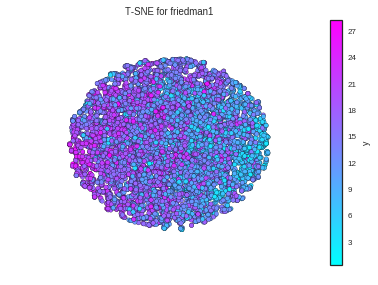

In [8]:
plot_tsne('friedman1', True, perplexity=5)